#Implementation of callback to implement Early Stopping.

Stops the training once the accuracy reaches a certain threshold, acheiving optimal model weights without wasting resources (time and computational)

In [ ]:
# setup of Iris dataset
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# get the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalise the data
df_norm = normalize(df)

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)

# one-hot encode the data
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

In [ ]:
# create the model
model = Sequential() 
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#What is a Callback?
A callback is a function that can be applied at a given stage of the training process.

#Setup the Early Stopping callback
This setup will monitor the loss and will stop the training when there's no improvement in the validation loss for 3 consecutive epochs as `patience=3`:

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=3)

Fit the model as before, except that there is an extra parameter of `callbacks=[es]`.

The training will stop if it detects there has been no improvement in the validation loss for 3 consecutive epochs

Epoch 1/300
12/12 [==============================] - 0s 11ms/step - loss: 0.3186 - accuracy: 0.9375 - val_loss: 0.3654 - val_accuracy: 0.8684
Epoch 2/300
12/12 [==============================] - 0s 5ms/step - loss: 0.3158 - accuracy: 0.9732 - val_loss: 0.3406 - val_accuracy: 0.9474
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 0.3122 - accuracy: 0.9732 - val_loss: 0.3456 - val_accuracy: 0.9211
Epoch 4/300
12/12 [==============================] - 0s 4ms/step - loss: 0.3093 - accuracy: 0.9464 - val_loss: 0.3699 - val_accuracy: 0.8158
Epoch 5/300
12/12 [==============================] - 0s 4ms/step - loss: 0.3002 - accuracy: 0.9554 - val_loss: 0.3390 - val_accuracy: 0.9211
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.9643 - val_loss: 0.3196 - val_accuracy: 0.9737
Epoch 7/300
12/12 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.9732 - val_loss: 0.3492 - val_accuracy: 0.8947
Epoch 8/300


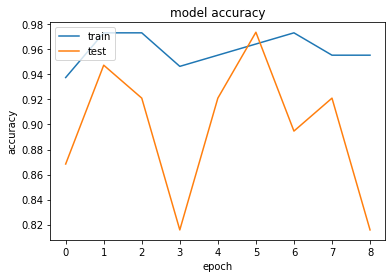

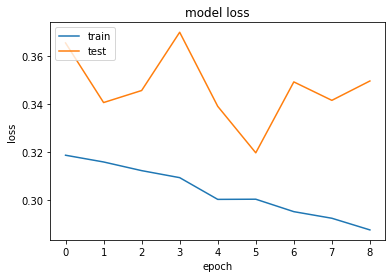

In [6]:

# Fit the model (replace the question marks)
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=300,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat), # input test data, output test data
    callbacks=[es])  

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Change the early stopping to work on the validation accuracy instead of the validation loss.  What problems can you see with this?